
# Python Time

Notes / scratchpad from exploring the pyhton time library.   
Cody

ody  


In [1]:
import time
import datetime
import dateutil.relativedelta

In [2]:
time.time()

1690664923.1439068

In [3]:
a = time.localtime()
print(a)
print(time.localtime(time.time()))

time.struct_time(tm_year=2023, tm_mon=7, tm_mday=29, tm_hour=14, tm_min=8, tm_sec=43, tm_wday=5, tm_yday=210, tm_isdst=1)
time.struct_time(tm_year=2023, tm_mon=7, tm_mday=29, tm_hour=14, tm_min=8, tm_sec=43, tm_wday=5, tm_yday=210, tm_isdst=1)


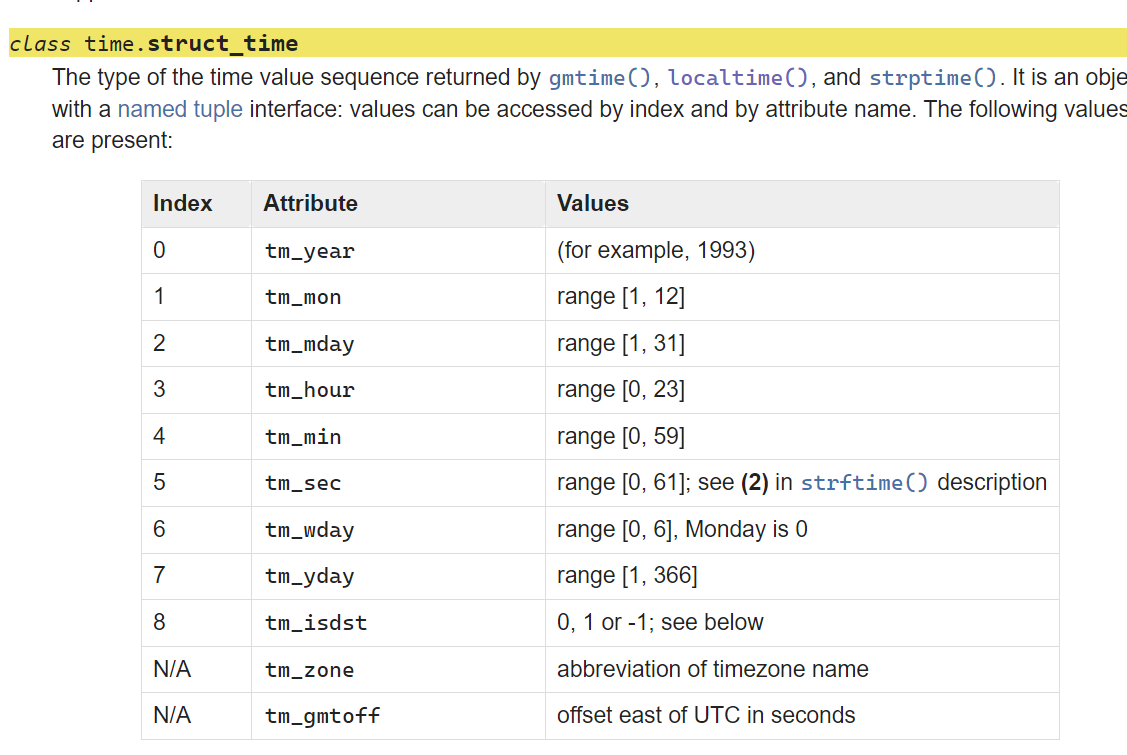

In [4]:
# Using this struct, one thing I can do is subsitute zeros in hours min seconds
midnight = time.struct_time(
    (a.tm_year, a.tm_mon, a.tm_mday, 0, 0, 0, a.tm_wday, a.tm_yday, a.tm_isdst, a.tm_zone, a.tm_gmtoff))
print(midnight)

time.struct_time(tm_year=2023, tm_mon=7, tm_mday=29, tm_hour=0, tm_min=0, tm_sec=0, tm_wday=5, tm_yday=210, tm_isdst=1)


## time.Time

Return the time in seconds since the epoch as a floating point number. The handling of leap seconds is platform dependent. On Windows and most Unix systems, the leap seconds are not counted towards the time in seconds since the epoch. This is commonly referred to as Unix time.

Note that even though the time is always returned as a floating point number, not all systems provide time with a better precision than 1 second. While this function normally returns non-decreasing values, it can return a lower value than a previous call if the system clock has been set back between the two calls.

The number returned by time() may be converted into a more common time format (i.e. year, month, day, hour, etc…) in UTC by passing it to gmtime() function or in local time by passing it to the localtime() function. In both cases a struct_time object is returned, from which the components of the calendar date may be accessed as attributes.

In [5]:
t1 = time.mktime(a)
t2 = time.mktime(midnight)

In [6]:
dt = t1-t2
print(f"delta-t-seconds = {dt}, delta-t-hours = {dt/3600}")

delta-t-seconds = 50923.0, delta-t-hours = 14.145277777777778


In [7]:
h,m,s = a.tm_hour, a.tm_min, a.tm_sec
print(h, m, s)

14 8 43


In [8]:
# keeping everything as a fraction of hours since midnight
frac_hrs = h + (m/60) +  (s/3600)
print(frac_hrs)

14.145277777777777


In [9]:
# Confirming that this is equivalent to the difference in seconds since epoch 
60 * 60 * frac_hrs

50922.99999999999

### Finally to create a function'

In [86]:
def get_dt():
    t = time.localtime()
    t1 = time.mktime(t) # current time

    t2 = time.struct_time((t.tm_year, t.tm_mon, t.tm_mday, 0, 0, 0, t.tm_wday, t.tm_yday, t.tm_isdst, t.tm_zone, t.tm_gmtoff))
    t2 = time.mktime(t2)
    return (t1-t2)/3600

In [87]:
get_dt()

14.213888888888889

In [85]:
0/3600

0.0